# BMW SALES ANALYSIS (2010-2024)

In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
df = pd.read_csv('BMW sales data (2010-2024) (1).csv')
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('BMW sales data (2010-2024) (1).csv')

In [6]:
#Basic data information
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [7]:
#Check for missing data
df.isnull().sum

<bound method DataFrame.sum of        Model   Year  Region  Color  Fuel_Type  Transmission  Engine_Size_L  \
0      False  False   False  False      False         False          False   
1      False  False   False  False      False         False          False   
2      False  False   False  False      False         False          False   
3      False  False   False  False      False         False          False   
4      False  False   False  False      False         False          False   
...      ...    ...     ...    ...        ...           ...            ...   
49995  False  False   False  False      False         False          False   
49996  False  False   False  False      False         False          False   
49997  False  False   False  False      False         False          False   
49998  False  False   False  False      False         False          False   
49999  False  False   False  False      False         False          False   

       Mileage_KM  Price_USD  Sa

In [8]:
#General metrics
f"Total revenue: ${df['Price_USD'].sum():,.0f}"
f"Total sales volume: {df['Sales_Volume'].sum():,.0f}"
f"Data period: {df['Year'].min()} - {df['Year'].max()} years"

'Data period: 2010 - 2024 years'

In [9]:
#Top model analysis
top_models = df.groupby('Model')['Sales_Volume'].sum().sort_values(ascending=False).head(10)
top_models

Model
7 Series    23786466
i8          23423891
X1          23406060
3 Series    23281303
i3          23133849
5 Series    23097519
M5          22779688
X3          22745529
X5          22709749
X6          22661986
Name: Sales_Volume, dtype: int64

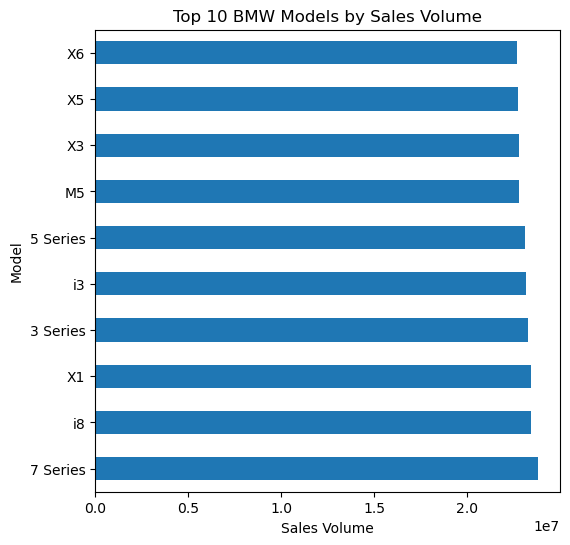

In [24]:
#Visualization
plt.figure(figsize=(6, 6))
top_models.plot(kind='barh')
plt.title('Top 10 BMW Models by Sales Volume')
plt.xlabel('Sales Volume')
plt.show()


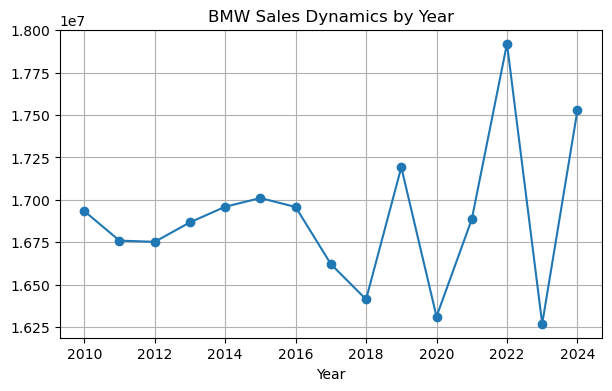

In [25]:
#Yearly sales analysis
yearly_sales = df.groupby('Year')['Sales_Volume'].sum()
yearly_sales
plt.figure(figsize=(7, 4))
yearly_sales.plot(marker='o')
plt.title('BMW Sales Dynamics by Year')
plt.grid(True)
plt.show()

In [12]:
#Regional analysis
region_analysis = df.groupby('Region').agg({
    'Sales_Volume': 'sum', 
    'Price_USD': 'mean'
}).sort_values('Sales_Volume', ascending=False)
region_analysis 

,Sales_Volume,Price_USD
Region,,
Asia,42974277,75554.925006
Europe,42555138,74988.356851
North America,42402629,75070.054709
Middle East,42326620,74726.788487
Africa,41565252,74885.771598
South America,41551818,74973.598837


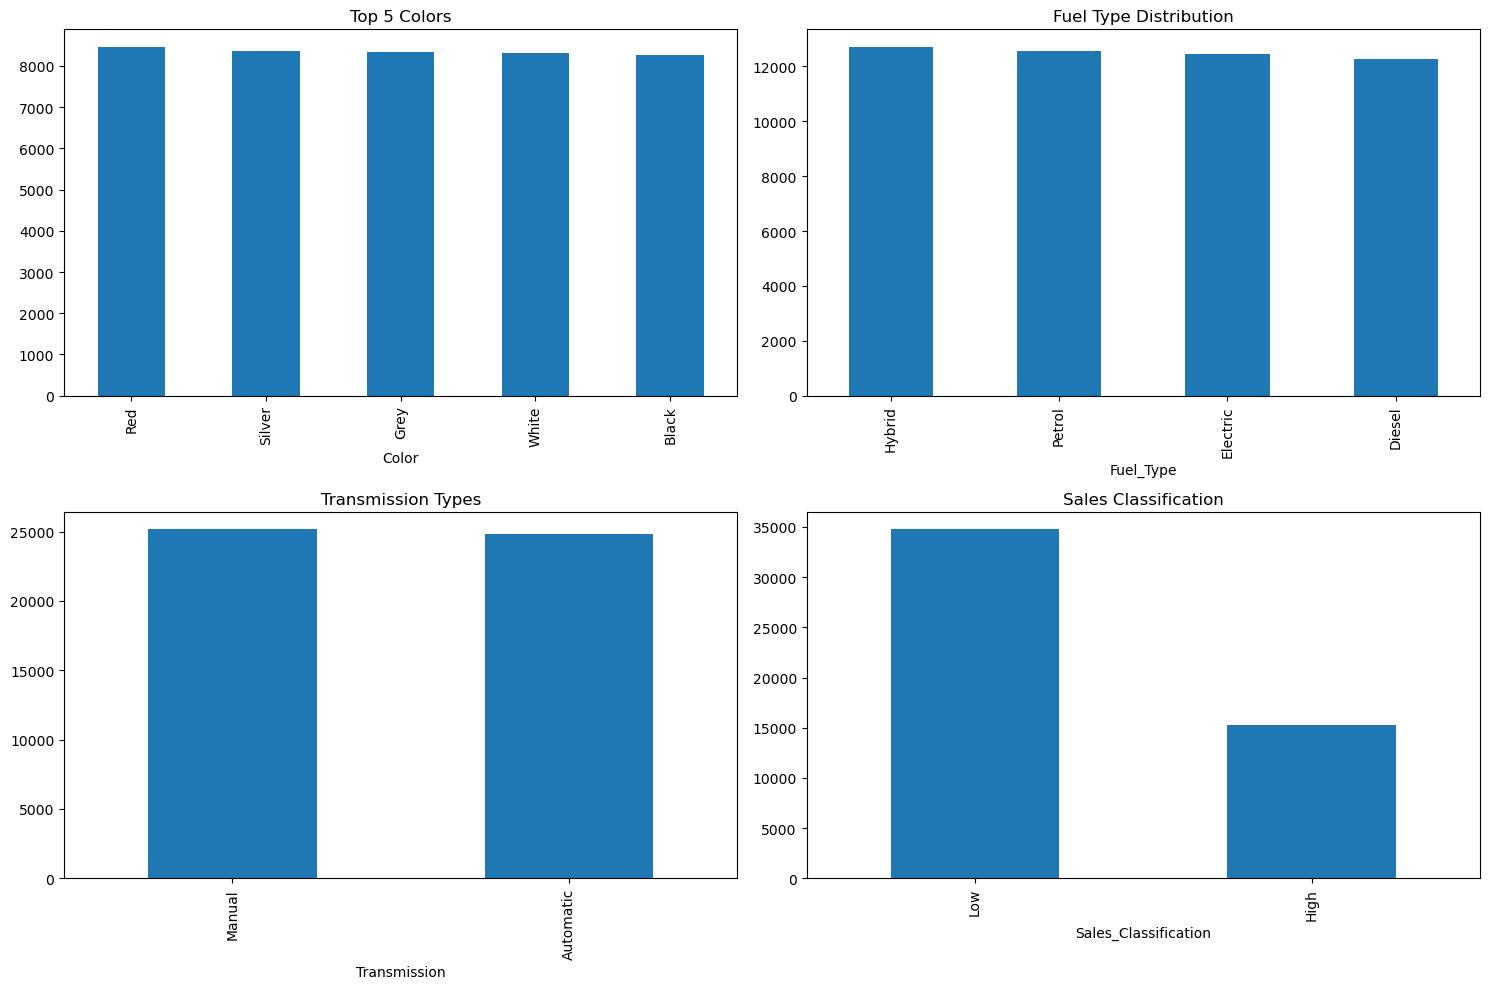

In [13]:
#Customer preferences analysis
plt.figure(figsize=(15, 10))

#Colors
plt.subplot(2, 2, 1)
df['Color'].value_counts(). head(5).plot(kind='bar')
plt.title('Top 5 Colors')

#Fuel types
plt.subplot(2, 2, 2)
df['Fuel_Type'].value_counts().plot(kind='bar')
plt.title('Fuel Type Distribution')

#Transmission
plt.subplot(2, 2, 3)
df['Transmission'].value_counts().plot(kind='bar')
plt.title('Transmission Types')

#Sales classification
plt.subplot(2, 2, 4)
df['Sales_Classification'].value_counts().plot(kind='bar')
plt.title('Sales Classification')
plt.tight_layout()
plt.show()

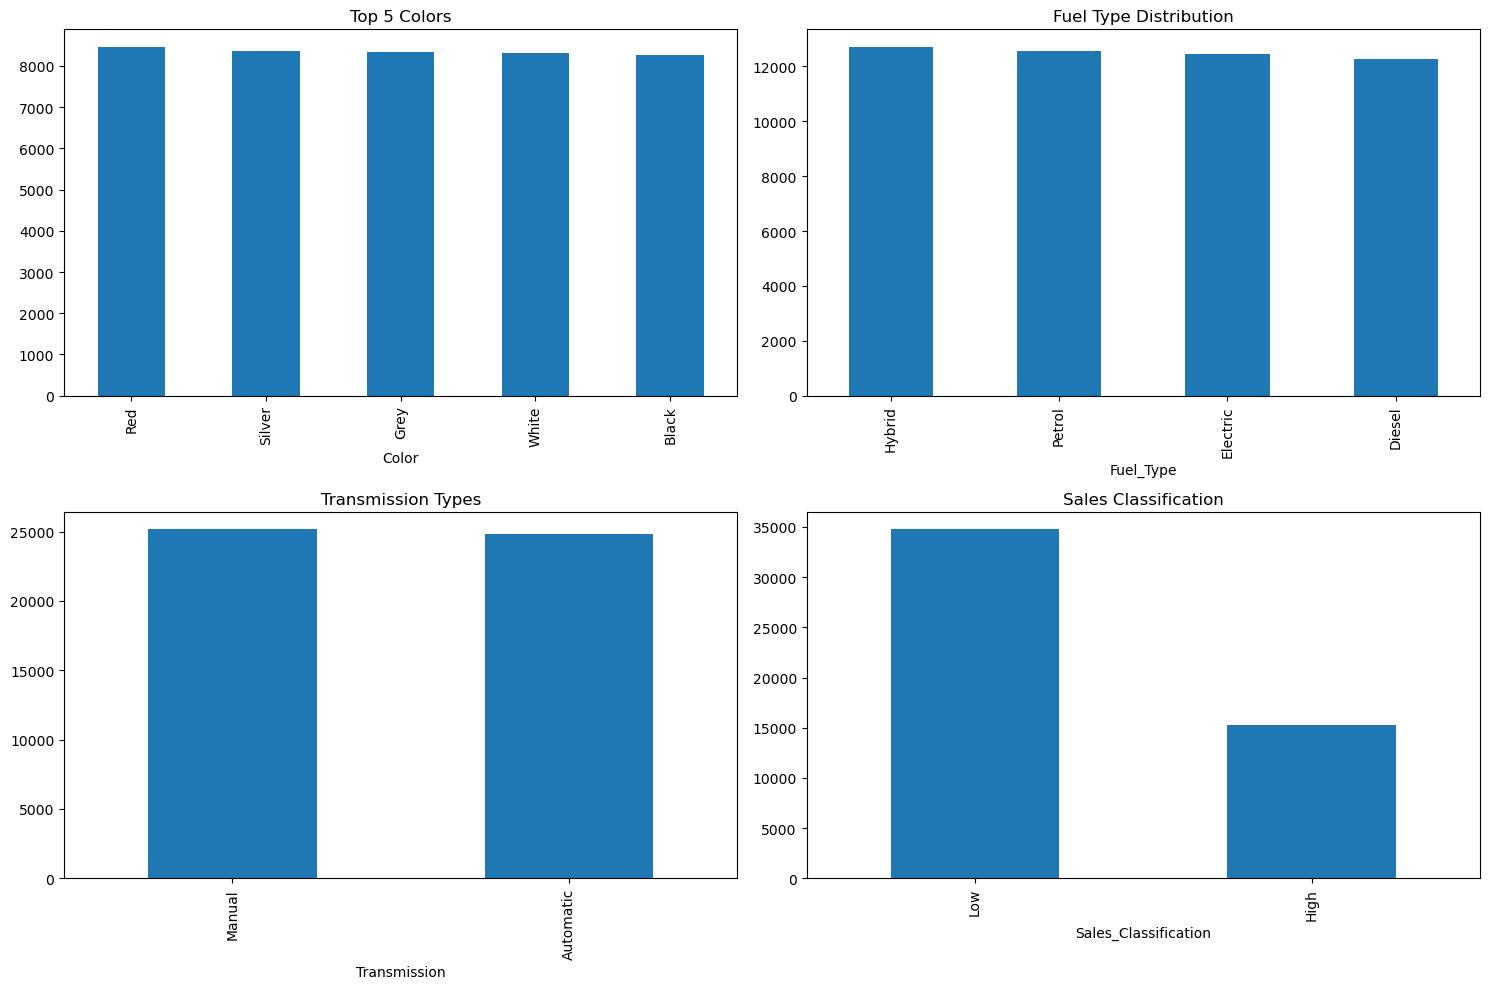

In [14]:
#Customer preferences analysis
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
df['Color'].value_counts(). head(5).plot(kind='bar')
plt.title('Top 5 Colors')

#Fuel types
plt.subplot(2, 2, 2)
df['Fuel_Type'].value_counts().plot(kind='bar')
plt.title('Fuel Type Distribution')

#Transmission
plt.subplot(2, 2, 3)
df['Transmission'].value_counts().plot(kind='bar')
plt.title('Transmission Types')

#Sales classification
plt.subplot(2, 2, 4)
df['Sales_Classification'].value_counts().plot(kind='bar')
plt.title('Sales Classification')

plt.tight_layout()
plt.show()

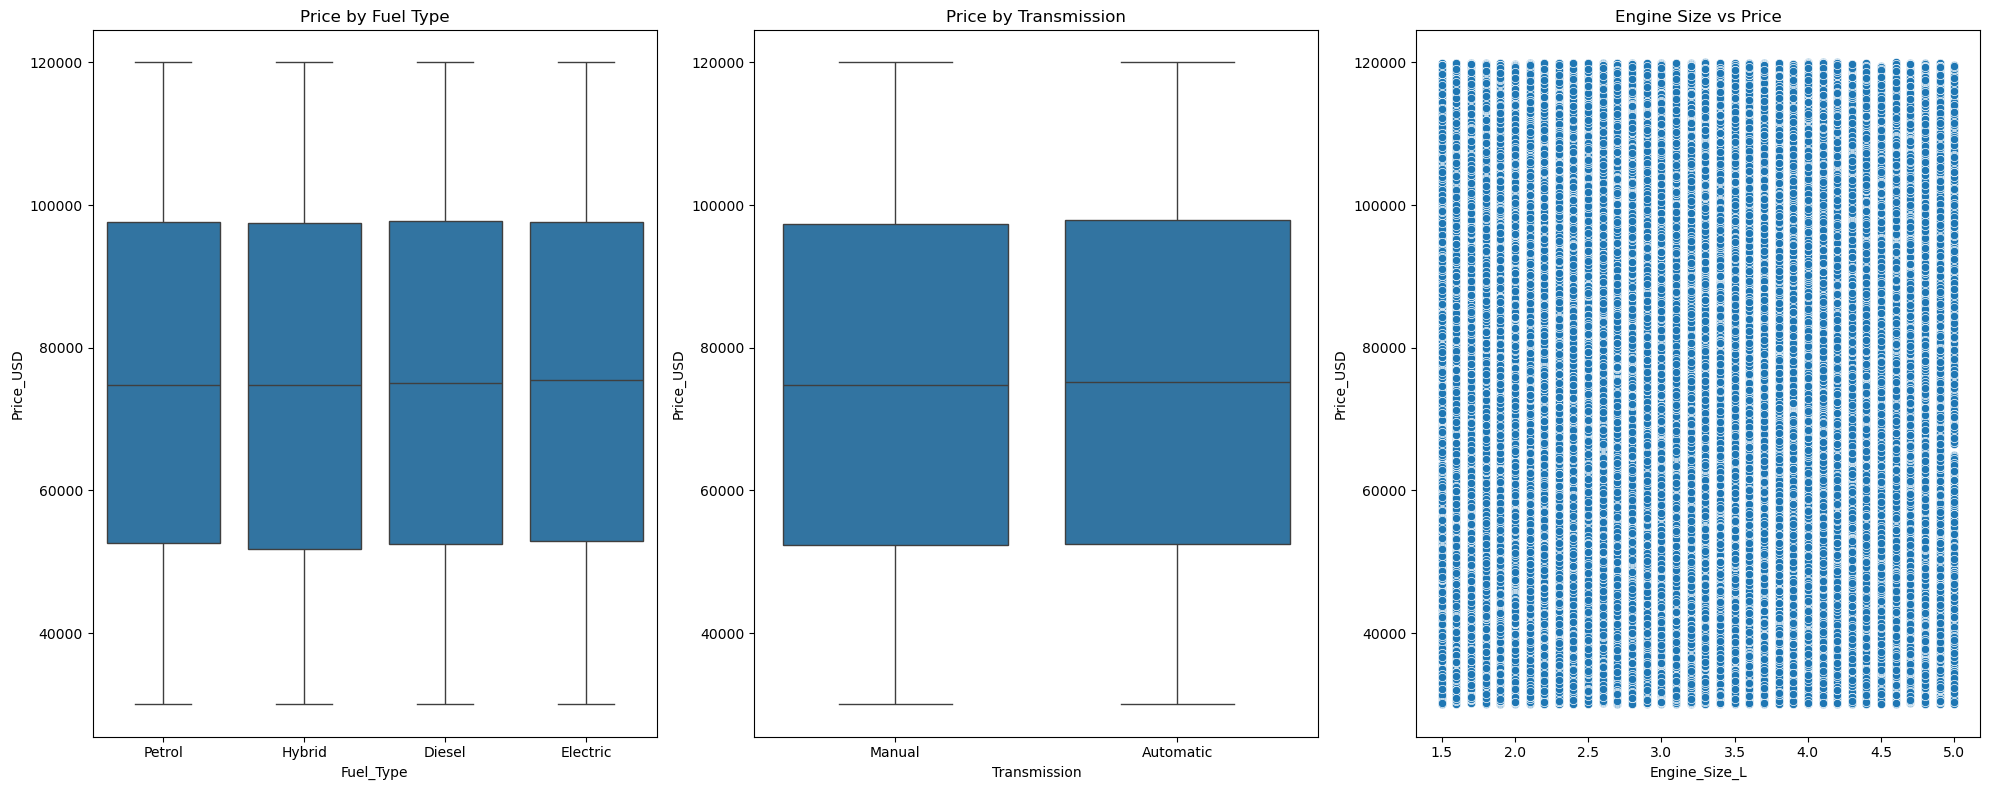

In [27]:
#Price analysis by features
plt.figure(figsize=(20,8))

#Price by fuel type
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='Fuel_Type', y='Price_USD')
plt.title('Price by Fuel Type')

#Price by transmission
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Transmission', y='Price_USD')
plt.title('Price by Transmission')

#Engine size vs price
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Engine_Size_L', y='Price_USD')
plt.title('Engine Size vs Price')

plt.tight_layout()
plt.show()

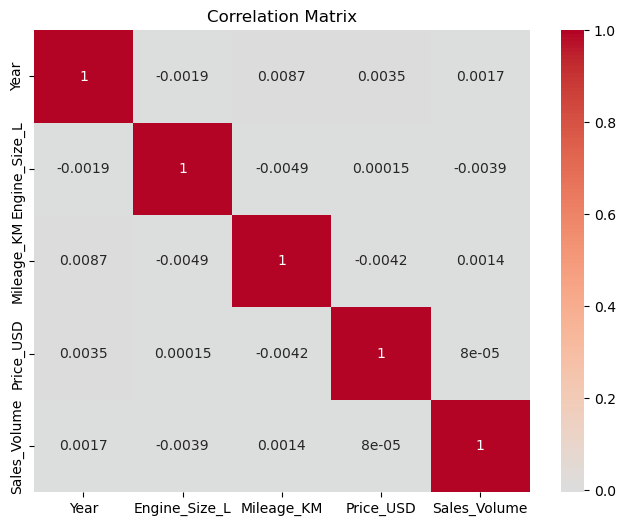

In [16]:
#Correlation analysis
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

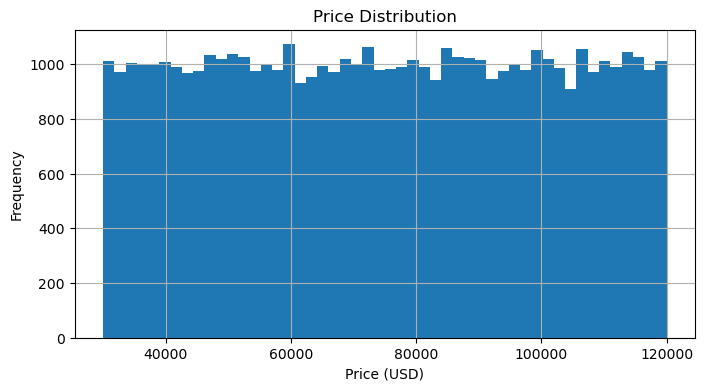

In [28]:
#Price distribution
plt.figure(figsize=(8, 4))
df['Price_USD'].hist(bins=50)
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

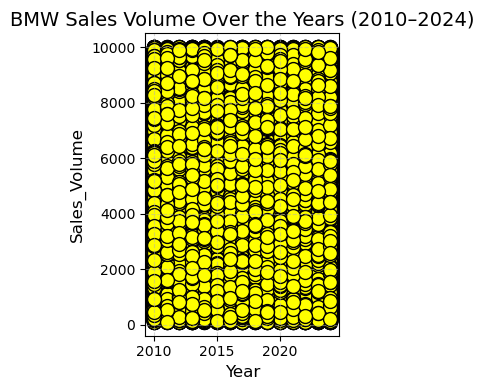

In [22]:
# scatter plot
plt.figure(figsize=(3,4))
plt.scatter(df['Year'], df['Sales_Volume'], color='yellow', edgecolors='black', s=100)

plt.title('BMW Sales Volume Over the Years (2010–2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales_Volume', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


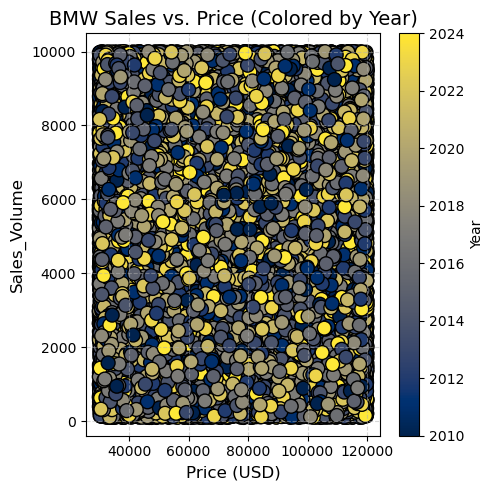

In [23]:
# Drop rows with missing values in 'Price' and 'Sales'
df = df.dropna(subset=['Price_USD', 'Sales_Volume'])

plt.figure(figsize=(5,5))
scatter = plt.scatter(df['Price_USD'], df['Sales_Volume'], c=df['Year'], cmap='cividis', edgecolors='black', s=100)

plt.title('BMW Sales vs. Price (Colored by Year)', fontsize=14)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Sales_Volume', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
cbar = plt.colorbar(scatter)
cbar.set_label('Year')
plt.tight_layout()
plt.show()
